In [79]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from scipy.ndimage import zoom
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Load scan image data and convert image data to NumPy array

Image shape: (155, 240, 240)
Data type: float64


(np.float64(0.0), np.float64(240.0), np.float64(0.0), np.float64(240.0))

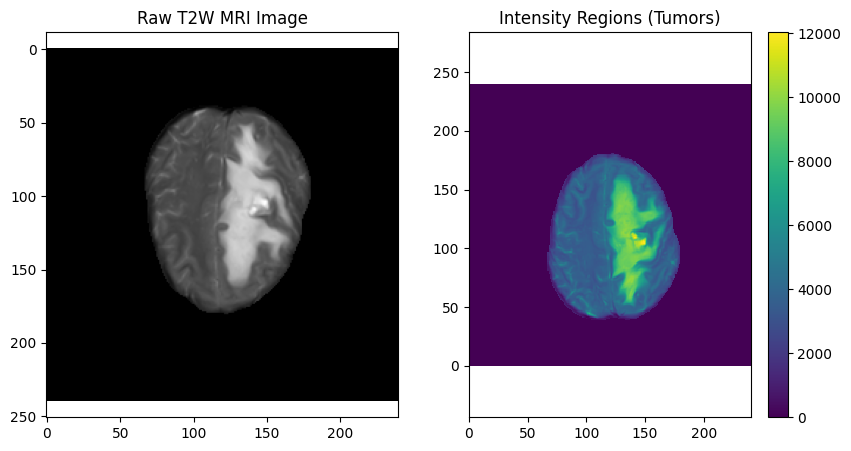

In [43]:
data = nib.load(r"C:\Users\user\Documents\Projects\Neuro-Imaging\data\95_Glioma\BraTS-SSA-00002-000\BraTS-SSA-00002-000-t2w.nii")  # replace with your filename

image = data.get_fdata().transpose()  

print(f"Image shape: {image.shape}")
print(f"Data type: {image.dtype}")

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Raw T2W MRI Image")
plt.imshow(image[110], cmap="gray")
plt.axis('equal')

plt.subplot(1,2,2)
plt.title("Intensity Regions (Tumors)")
plt.pcolormesh(image[110])
plt.colorbar()
plt.axis('equal')

Masking regions and display image slice number 110

(np.float64(0.0), np.float64(240.0), np.float64(0.0), np.float64(240.0))

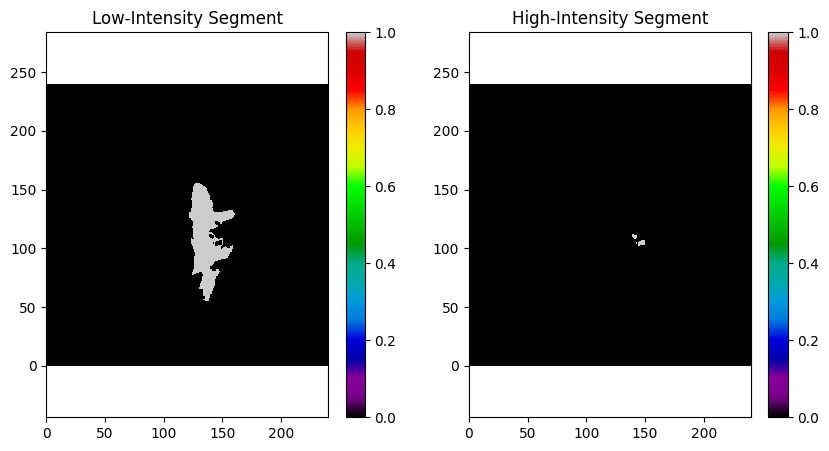

In [49]:
masked_1 = (image >= 8000) & (image < 10500) 
masked_2 = image > 10500 

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.pcolormesh(masked_1[110], cmap="nipy_spectral")
plt.title("Low-Intensity Segment" )
plt.colorbar()
plt.axis('equal')

plt.subplot(1,2,2)
plt.pcolormesh(masked_2[110], cmap="nipy_spectral")
plt.title("High-Intensity Segment")
plt.colorbar()
plt.axis('equal')

Clear borders

(np.float64(0.0), np.float64(240.0), np.float64(0.0), np.float64(240.0))

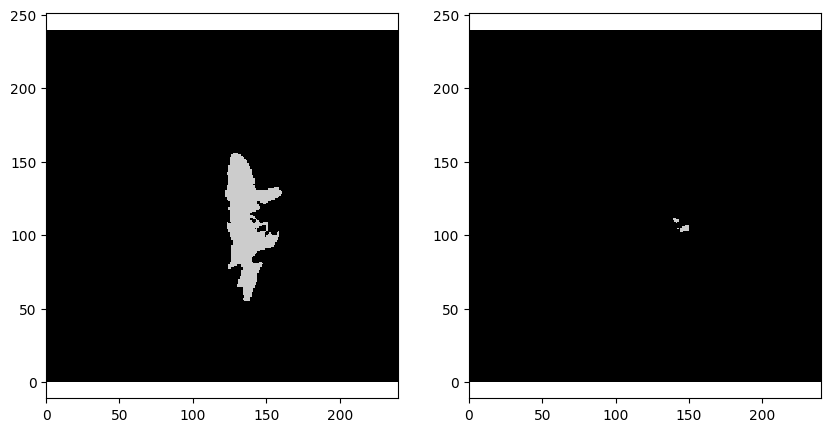

In [50]:
cleared_border_1 = np.vectorize(clear_border, signature='(n,m)->(n,m)')(masked_1)
cleared_border_2 = np.vectorize(clear_border, signature='(n,m)->(n,m)')(masked_2)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.pcolormesh(cleared_border_1[110], cmap="nipy_spectral")
plt.axis('equal')

plt.subplot(1,2,2)
plt.pcolormesh(cleared_border_2[110], cmap="nipy_spectral")
plt.axis('equal')

Pack the identified regions into one composite image for further analysis

(np.float64(0.0), np.float64(240.0), np.float64(0.0), np.float64(240.0))

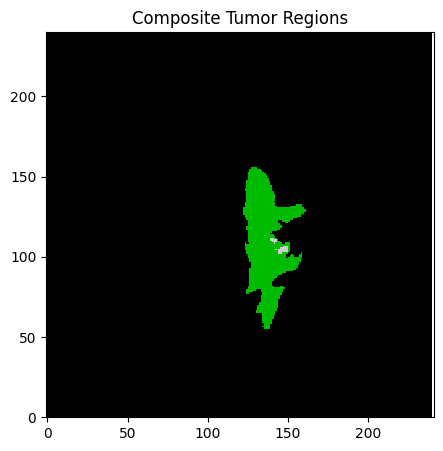

In [56]:
composite = np.zeros_like(image, dtype=int)
composite[cleared_border_1] = 1
composite[cleared_border_2] = 2

plt.figure(figsize=(5,5))
plt.pcolormesh(composite[110],cmap="nipy_spectral")
plt.title("Composite Tumor Regions")
plt.axis('equal')

Add labels to the regions

In [59]:
labels = np.vectorize(label, signature='(n,m)->(n,m)')(composite)
labels.shape

(155, 240, 240)

Check region properties

In [60]:
rps = regionprops(labels)

In [61]:
areas = [r.area for r in rps]
idx = np.argsort(areas)[::-1]     #get index/position of each area or descending order

print("Areas :", areas)
print("indixes :", idx)

Areas : [np.float64(50610.0), np.float64(21183.0), np.float64(8580.0), np.float64(3798.0), np.float64(1641.0), np.float64(2217.0), np.float64(2278.0), np.float64(2095.0), np.float64(1287.0), np.float64(768.0), np.float64(604.0), np.float64(668.0), np.float64(633.0), np.float64(281.0), np.float64(624.0), np.float64(368.0), np.float64(578.0), np.float64(534.0), np.float64(393.0), np.float64(281.0), np.float64(97.0), np.float64(125.0), np.float64(103.0), np.float64(107.0), np.float64(61.0), np.float64(59.0), np.float64(9.0), np.float64(67.0), np.float64(38.0), np.float64(2.0), np.float64(9.0), np.float64(2.0)]
indixes : [ 0  1  2  3  6  5  7  4  8  9 11 12 14 10 16 17 18 15 19 13 21 23 22 20
 27 24 25 28 30 26 29 31]


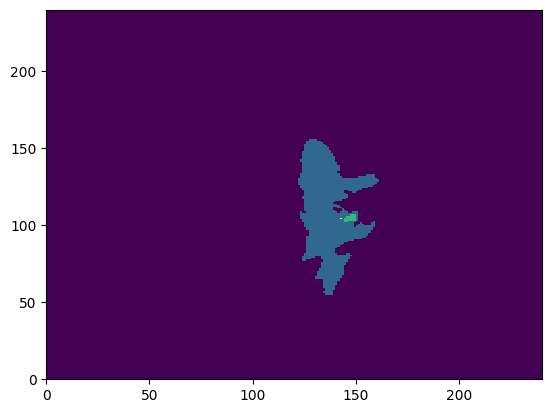

In [74]:
new_slice = np.zeros_like(image)

for i in idx[:3]:
    new_slice[tuple(rps[i].coords.T)] = i+1

plt.pcolormesh(new_slice[110])

PUTTING ALL REGIONS BACK TOGETHER

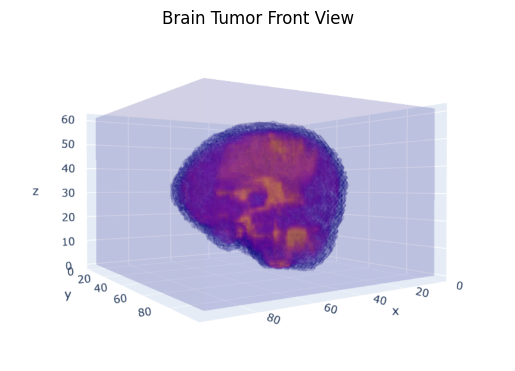

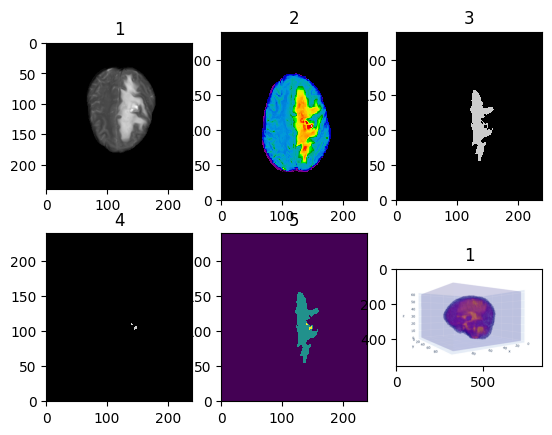

In [80]:
data2 = r"C:\Users\user\Documents\Projects\Neuro-Imaging\Results\Brain_Tumor_Front_View_3D.PNG"
image1 = mpimg.imread(data2)

plt.imshow(image1, cmap="gray")  
plt.title("Brain Tumor Front View")
plt.axis('off')
plt.show()

plt.subplot(2,3,1)
plt.title("1")
plt.imshow(image[110], cmap="gray")

plt.subplot(2,3,2)
plt.title("2")
plt.pcolormesh(image[110], cmap="nipy_spectral")

plt.subplot(2,3,3)
plt.title("3")
plt.pcolormesh(cleared_border_1[110], cmap="nipy_spectral")

plt.subplot(2,3,4)
plt.title("4")
plt.pcolormesh(cleared_border_2[110], cmap="nipy_spectral")

plt.subplot(2,3,5)
plt.title("5")
plt.pcolormesh(composite[110])

plt.subplot(2,3,6)
plt.title("1")
plt.imshow(image1)

plt.show()

Save 3D visualisation to HTML render

In [66]:
new_slice.shape

(155, 240, 240)

In [76]:
im = zoom(1*(new_slice),(0.4,0.4,0.4)) #reduce dimensions by 40% on each axis

In [68]:
im.shape

(62, 96, 96)

In [69]:
z,y,x = [np.arange(i) for i in im.shape]

In [70]:
x,y,z = np.meshgrid(x,y,z, indexing='ij')

In [71]:
fig = go.Figure(data=go.Volume
               (x=x.flatten(),
               y=y.flatten(),
               z=z.flatten(),
               value=np.transpose(im,(1,2,0)).flatten(),
               isomin = 0.1,
               opacity=0.1,
               surface_count=17,))



In [72]:
fig.write_html(r"C:\Users\user\Documents\Projects\Neuro-Imaging\test7.html")